In [1]:
import pandas as pd
import numpy
import matplotlib
import importlib

C:\Users\Rogger\AppData\Local\Temp\ipykernel_26148\2166467557.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
archivo = 'D:\Diplomados\modulo2\DataCovid.xlsx'
data = pd.read_excel(archivo, sheet_name='BD_coronavirus')
data.describe()

,id,ano,semana,edad,peso,talla,convulsion_hos,disnea_hos,coma_hos,auscultacion_hos,...,contacto_trabajo,contacto_desconocido,entorno_salud,entorno_familiar,entorno_trabajo,casa_reposo,centro_penitenciario,albergue,entorno_desconocido,secuenciamiento
count,9.531500e+04,95315.000000,95315.000000,95315.000000,37097.000000,37097.000000,32403.000000,32441.000000,32404.000000,32452.000000,...,66668.000000,66668.000000,95315.000000,95315.000000,95315.000000,37097.000000,37097.000000,37097.000000,95315.000000,0.0
mean,4.052912e+06,2020.330389,27.398017,40.803158,5471.640672,7.447080,0.000185,0.023150,0.000216,0.033372,...,0.039884,0.001425,0.003431,0.082463,0.037591,0.000377,0.000081,0.000108,0.004501,NaN
std,2.400408e+06,0.470378,13.196562,17.490189,20297.434552,32.386704,0.013607,0.150381,0.014696,0.179610,...,0.195689,0.037722,0.058472,0.275071,0.190206,0.019423,0.008992,0.010383,0.066938,NaN
min,5.420000e+02,2019.000000,1.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2.218709e+06,2020.000000,16.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.684364e+06,2020.000000,31.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,6.146330e+06,2021.000000,37.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,8.431927e+06,2021.000000,53.000000,113.000000,895000.000000,188.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [3]:
df=data
print(df.head())

     id   ano  semana   fecha_not diresa        red       microred  \
0   542  2021       5  09-02-2021   PUNO       PUNO   SIN MICRORED   
1  1234  2020      10  07-03-2020   PUNO  SAN ROMAN   SIN MICRORED   
2  1258  2020      10  09-03-2020   PUNO       PUNO   SIN MICRORED   
3  1266  2020      10  09-03-2020   PUNO  SAN ROMAN   SIN MICRORED   
4  1292  2021       9  05-03-2021   PUNO       PUNO  METROPOLITANO   

                           establecimiento        institucion clasificacion  \
0  HOSP. REG. "MANUEL NUÑEZ BUTRÓN" - PUNO  GOBIERNO REGIONAL    DESCARTADO   
1   HOSP. "CARLOS MONGE MEDRANO" - JULIACA  GOBIERNO REGIONAL    DESCARTADO   
2                  HOSPITAL III DE ESSALUD            ESSALUD    DESCARTADO   
3   HOSP. "CARLOS MONGE MEDRANO" - JULIACA  GOBIERNO REGIONAL    DESCARTADO   
4                  C.S. METROPOLITANO PUNO  GOBIERNO REGIONAL    CONFIRMADO   

   ... prueba_rap resultado_rap fecha_res_rap  fecha_rap1  muestra_rap1  \
0  ...        NaN           N

In [68]:
# Paso 1: Crear un DataFrame de booleanos indicando dónde están los valores nulos
df_nulls = df.isna()

print(df.isna())
# Paso 2: Sumar los valores booleanos a lo largo de cada columna para obtener la cantidad de valores nulos por columna
suma_nulls = df_nulls.sum()
print(df_nulls.sum())
# Paso 3: Obtener la longitud total del DataFrame (número total de filas)
cantidad_total_filas = len(data)


# Paso 4: Calcular la proporción de valores nulos en cada columna con respecto al total de filas
# El resultado es una Serie con el porcentaje de valores nulos por columna
porcentaje_nulls = (suma_nulls / cantidad_total_filas) * 100

# El resultado final es la Serie que muestra el porcentaje de valores nulos en cada columna del DataFrame

porcentaje_nulls_signo = (porcentaje_nulls).round(3).astype(str) + " %"



          id    ano  semana  fecha_not  diresa    red  microred  \
0      False  False   False      False   False  False     False   
1      False  False   False      False   False  False     False   
2      False  False   False      False   False  False     False   
3      False  False   False      False   False  False     False   
4      False  False   False      False   False  False     False   
...      ...    ...     ...        ...     ...    ...       ...   
95310  False  False   False      False   False  False     False   
95311  False  False   False      False   False  False     False   
95312  False  False   False      False   False  False     False   
95313  False  False   False      False   False  False     False   
95314  False  False   False      False   False  False     False   

       establecimiento  institucion  clasificacion  ...  fecha_res1  \
0                False        False          False  ...       False   
1                False        False          False  .

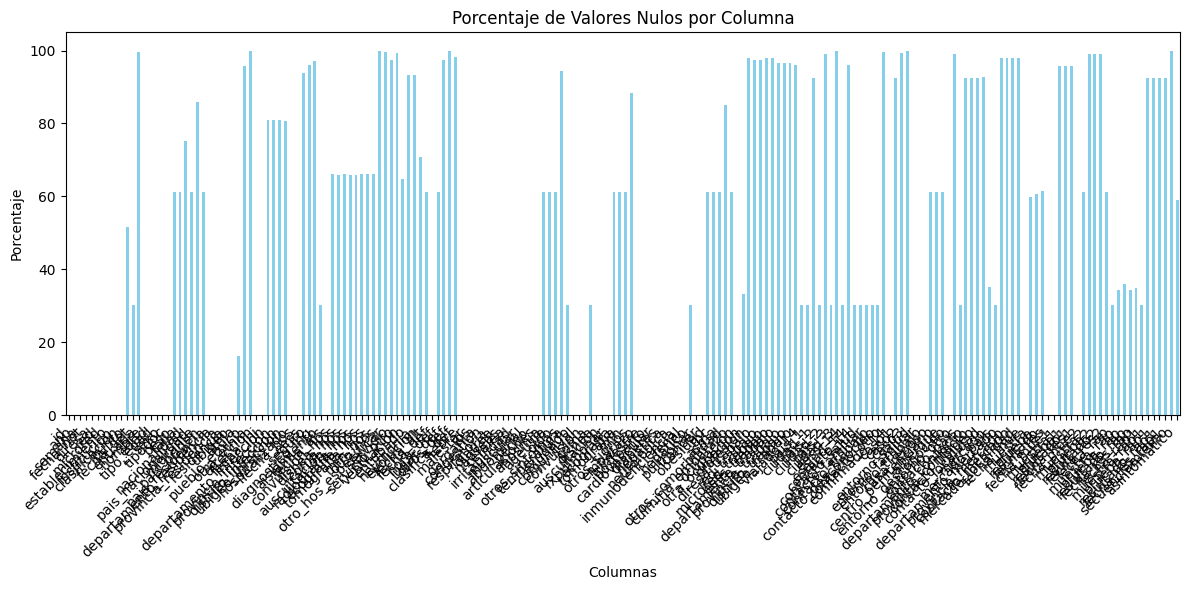

In [22]:
import matplotlib.pyplot as plt
result_percentage = porcentaje_nulls.round(3)

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
result_percentage.plot(kind='bar', color='skyblue')
plt.title('Porcentaje de Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor claridad
plt.tight_layout()

# Mostrar el gráfico
plt.show()



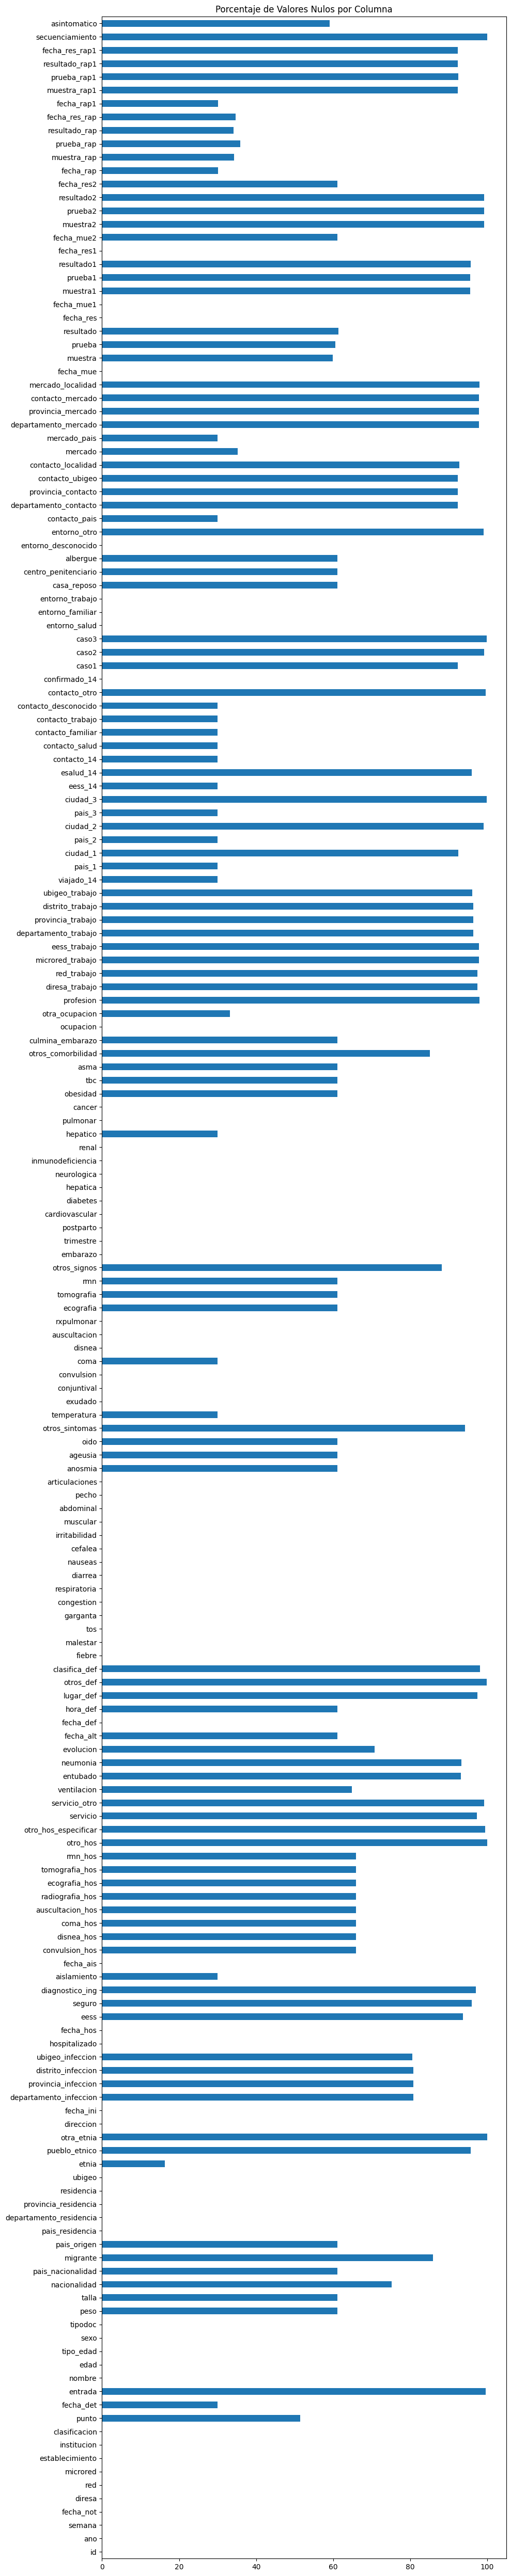

In [24]:
plt.figure(figsize=(10, 50))
result_percentage.plot.barh(x='lab', y='val')
plt.title('Porcentaje de Valores Nulos por Columna')
plt.tight_layout()

## 1. Eliminar las columnas cuyos datos que tengan el 75% de nulls en adelante, ya que no son representativos

In [39]:
#porcentaje de null  en regla de 3 simple
def getNullPercent(columnName):
  #columnName='semana'
  totalNulls=df[columnName].isna().sum()
  totalRegistros=len(df[columnName])
  nullPercent=100*totalNulls/totalRegistros
  return nullPercent

print(round(getNullPercent('id'),2))
print(round(getNullPercent('entrada'),2))


0.0
99.64


In [41]:
# columnas a remover
def getColumsToDelete():

  columnsDelete=[]
  for column in df.columns:
    nameColumn=column
    percentNull=round(getNullPercent(column),2)
    if(percentNull>=75):
      #print(f"{nameColumn}:   {percentNull}% -->será removido")
      columnsDelete.append(nameColumn)
    else:
      #print(f"{nameColumn}:   {percentNull}%")
      pass
  return columnsDelete

print(getColumsToDelete())


['entrada', 'nacionalidad', 'migrante', 'pueblo_etnico', 'otra_etnia', 'departamento_infeccion', 'provincia_infeccion', 'distrito_infeccion', 'ubigeo_infeccion', 'eess', 'seguro', 'diagnostico_ing', 'otro_hos', 'otro_hos_especificar', 'servicio', 'servicio_otro', 'entubado', 'neumonia', 'lugar_def', 'otros_def', 'clasifica_def', 'otros_sintomas', 'otros_signos', 'otros_comorbilidad', 'profesion', 'diresa_trabajo', 'red_trabajo', 'microred_trabajo', 'eess_trabajo', 'departamento_trabajo', 'provincia_trabajo', 'distrito_trabajo', 'ubigeo_trabajo', 'ciudad_1', 'ciudad_2', 'ciudad_3', 'esalud_14', 'contacto_otro', 'caso1', 'caso2', 'caso3', 'entorno_otro', 'departamento_contacto', 'provincia_contacto', 'contacto_ubigeo', 'contacto_localidad', 'departamento_mercado', 'provincia_mercado', 'contacto_mercado', 'mercado_localidad', 'muestra1', 'prueba1', 'resultado1', 'muestra2', 'prueba2', 'resultado2', 'muestra_rap1', 'prueba_rap1', 'resultado_rap1', 'fecha_res_rap1', 'secuenciamiento']


In [42]:
df=df.drop(columns=getColumsToDelete())

Counter({'FEMENINO': 50301, 'MASCULINO': 45014})
               0
MASCULINO  45014
FEMENINO   50301


<Figure size 5000x5000 with 0 Axes>

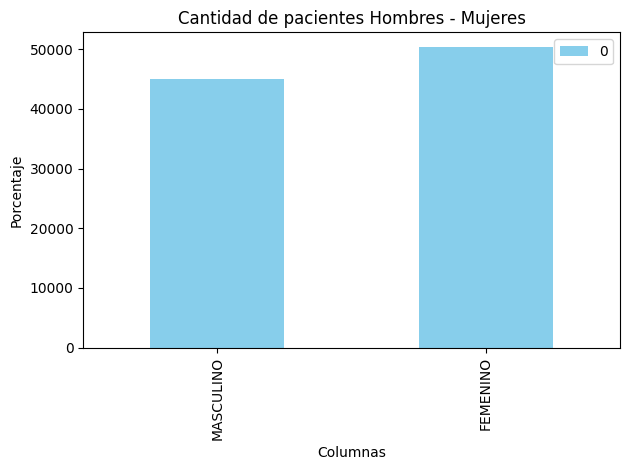

In [66]:
import collections

c = collections.Counter(df['sexo'])

print(c)

#df2 = pd.DataFrame.from_dict(c, orient='index').reset_index()
df2 = pd.DataFrame.from_dict(c, orient='index')
print(df2)
plt.figure(figsize=(50, 50))
df2.plot(kind='bar', color='skyblue')
plt.title('Cantidad de pacientes Hombres - Mujeres')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje')
#plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor claridad
plt.tight_layout()

# Mostrar el gráfico
plt.show()



Counter({'GOBIERNO REGIONAL': 70295, 'ESSALUD': 20256, 'PRIVADO': 2387, 'SANIDAD DE LA POLICIA NACIONAL DEL PERU': 2129, 'SANIDAD DEL EJERCITO DEL PERU': 231, nan: 17})
                                             0
GOBIERNO REGIONAL                        70295
ESSALUD                                  20256
SANIDAD DE LA POLICIA NACIONAL DEL PERU   2129
PRIVADO                                   2387
SANIDAD DEL EJERCITO DEL PERU              231
NaN                                         17


<Figure size 5000x5000 with 0 Axes>

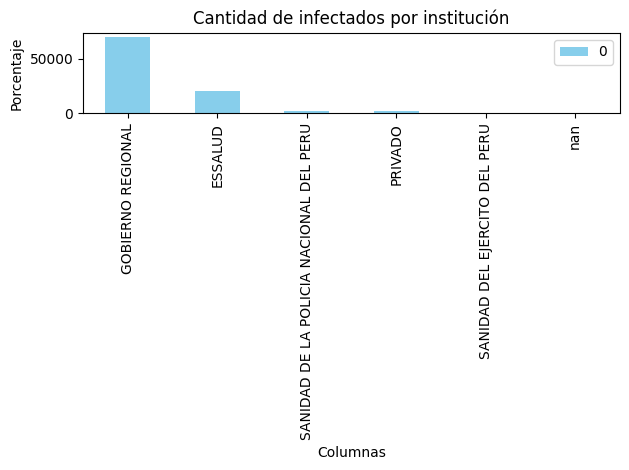

In [62]:
import collections

d = collections.Counter(df['institucion'])

print(d)

#df2 = pd.DataFrame.from_dict(c, orient='index').reset_index()
df2 = pd.DataFrame.from_dict(d, orient='index')
print(df2)
plt.figure(figsize=(50, 50))
df2.plot(kind='bar', color='skyblue')
plt.title('Cantidad de infectados por institución')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje')
#plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor claridad
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Counter({'CONFIRMADO': 51293, 'DESCARTADO': 34325, 'SOSPECHOSO': 9611, 'PROBABLE': 82, nan: 4})
                0
DESCARTADO  34325
CONFIRMADO  51293
SOSPECHOSO   9611
PROBABLE       82
NaN             4


<Figure size 5000x5000 with 0 Axes>

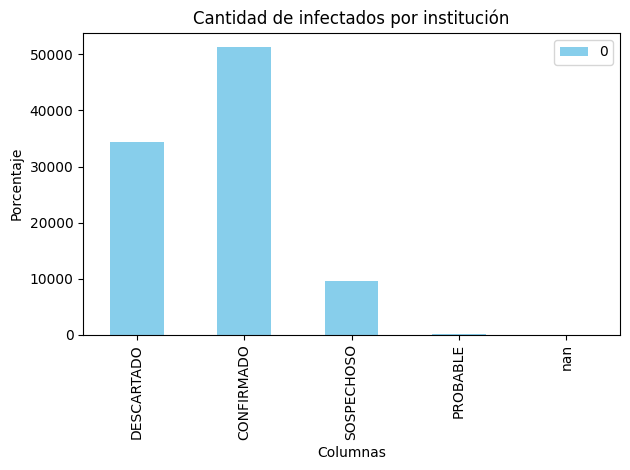

In [61]:
d = collections.Counter(df['clasificacion'])

print(d)

#df2 = pd.DataFrame.from_dict(c, orient='index').reset_index()
df2 = pd.DataFrame.from_dict(d, orient='index')
print(df2)
plt.figure(figsize=(50, 50))
df2.plot(kind='bar', color='skyblue')
plt.title('Clasificacion de los pacientes')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje')
#plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor claridad
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Counter({'PUNO': 94148, 'LIMA': 363, 'AREQUIPA': 326, 'CUSCO': 119, 'TACNA': 74, 'MOQUEGUA': 46, 'MADRE DE DIOS': 43, 'HUANUCO': 22, 'JUNIN': 21, nan: 21, 'CALLAO': 20, 'PIURA': 13, 'APURIMAC': 13, 'ICA': 10, 'CAJAMARCA': 10, 'AYACUCHO': 9, 'PASCO': 9, 'ANCASH': 8, 'SAN MARTIN': 7, 'LA LIBERTAD': 7, 'LAMBAYEQUE': 7, 'AMAZONAS': 6, 'UCAYALI': 6, 'HUANCAVELICA': 4, 'LORETO': 2, 'TUMBES': 1})
                   0
PUNO           94148
AREQUIPA         326
TACNA             74
LIMA             363
CUSCO            119
MADRE DE DIOS     43
AMAZONAS           6
HUANUCO           22
SAN MARTIN         7
MOQUEGUA          46
ANCASH             8
CALLAO            20
JUNIN             21
LA LIBERTAD        7
LAMBAYEQUE         7
PIURA             13
ICA               10
APURIMAC          13
LORETO             2
CAJAMARCA         10
NaN               21
UCAYALI            6
HUANCAVELICA       4
AYACUCHO           9
PASCO              9
TUMBES             1


<Figure size 5000x5000 with 0 Axes>

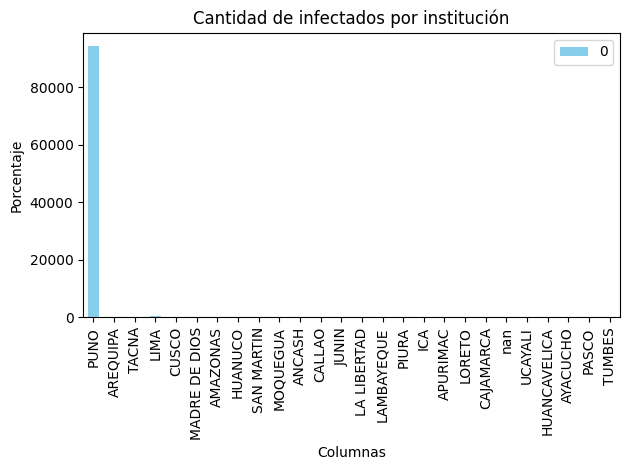

In [63]:
d = collections.Counter(df['departamento_residencia'])

print(d)

#df2 = pd.DataFrame.from_dict(c, orient='index').reset_index()
df2 = pd.DataFrame.from_dict(d, orient='index')
print(df2)
plt.figure(figsize=(50, 50))
df2.plot(kind='bar', color='skyblue')
plt.title('Cantidad de pacientes por Departamento')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje')
#plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor claridad
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Counter({'PUNO': 39307, 'SAN ROMAN': 23147, 'CHUCUITO': 6726, 'AZANGARO': 5337, 'LAMPA': 4117, 'EL COLLAO': 3518, 'HUANCANE': 2417, 'SANDIA': 2278, 'CARABAYA': 2275, 'MELGAR': 1752, 'YUNGUYO': 1425, 'SAN ANTONIO DE PUTINA': 1384, 'MOHO': 465, 'LIMA': 357, 'AREQUIPA': 285, 'TACNA': 69, 'CUSCO': 59, 'TAMBOPATA': 33, 'MARISCAL NIETO': 32, 'CAYLLOMA': 21, nan: 21, 'CALLAO': 20, 'CANCHIS': 17, 'ESPINAR': 16, 'HUANCAYO': 11, 'HUANUCO': 11, 'ILO': 11, 'CAMANA': 9, 'PIURA': 9, 'PASCO': 9, 'MANU': 8, 'PUERTO INCA': 8, 'ISLAY': 7, 'ABANCAY': 7, 'QUISPICANCHI': 6, 'TRUJILLO': 6, 'ICA': 6, 'CHICLAYO': 6, 'CALCA': 5, 'CAJAMARCA': 5, 'CORONEL PORTILLO': 5, 'LA CONVENCION': 5, 'HUAMANGA': 5, 'HUAROCHIRI': 4, 'ANDAHUAYLAS': 4, 'CHUMBIVILCAS': 4, 'TARATA': 4, 'BAGUA': 4, 'GENERAL SANCHEZ CERRO': 3, 'URUBAMBA': 3, 'SATIPO': 3, 'PICOTA': 3, 'SAN MARTIN': 2, 'CONCEPCION': 2, 'NAZCA': 2, 'SANTA': 2, 'HUARAZ': 2, 'TARMA': 2, 'TAHUAMANU': 2, 'SAN IGNACIO': 2, 'HUANCAVELICA': 2, 'ACOMAYO': 2, 'PAITA': 2, 'CAR

<Figure size 5000x5000 with 0 Axes>

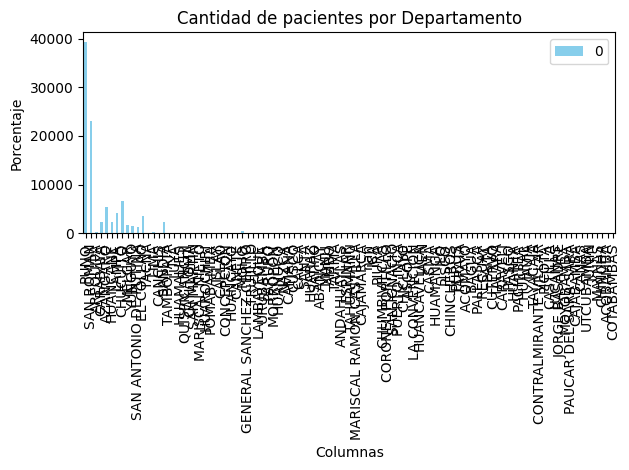

In [64]:
d = collections.Counter(df['provincia_residencia'])

print(d)

#df2 = pd.DataFrame.from_dict(c, orient='index').reset_index()
df2 = pd.DataFrame.from_dict(d, orient='index')
print(df2)
plt.figure(figsize=(50, 50))
df2.plot(kind='bar', color='skyblue')
plt.title('Cantidad de pacientes por Departamento')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje')
#plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor claridad
plt.tight_layout()

# Mostrar el gráfico
plt.show()